## 1- Objetivo
 
 - Encontrar o melhor modelo para a previsão de faturamento.
 

 - Importando os dados preprocessados

In [18]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import date

In [19]:
url = 'https://raw.githubusercontent.com/robertferro/studio-estetica/main/dados_modelagem.csv'

In [20]:
dados = pd.read_csv(url, sep = ',')

In [21]:
dados.head()

,Unnamed: 0,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
0,1,2018-12-23,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,270.0
1,2,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,560.0
4,5,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,90.0


## 2. Manipulação de dados.


 - Criando novas colunas referentes a data que vão auxiliar o algoritmo.

In [22]:
dados = dados.drop('Unnamed: 0' , axis = 1)

In [23]:
# reorganizando os dados referentes a data 

def date_to_weekday(date):
    weekday_dict = {0:'segunda', 1:'terca', 2: 'quarta', 3: 'quinta', 4: 'sexta', 5: 'sabado', 6: 'domingo'}
    date_time_obj = datetime.datetime.strptime(date, '%Y-%m-%d')
    return weekday_dict[date_time_obj.weekday()]

date = dados['data_atendimento'].str.split("-", n = 3, expand = True)
dados['ano'] = date[0].astype('int32')
dados['dia'] = date[2].astype('int32')
dados['mes'] = date[1].astype('int32')
dados['dia_da_semana'] = dados['data_atendimento'].apply(date_to_weekday)

In [24]:
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento,ano,dia,mes,dia_da_semana
0,2018-12-23,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,270.0,2018,23,12,domingo
1,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,24,12,segunda
2,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,25,12,terca
3,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,560.0,2018,26,12,quarta
4,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,90.0,2018,27,12,quinta


In [25]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_atendimento        740 non-null    object 
 1   design_de_sobrancelhas  740 non-null    float64
 2   design_coloracao        740 non-null    float64
 3   design_coloracao_buco   740 non-null    float64
 4   buco                    740 non-null    float64
 5   brown_lamination        740 non-null    float64
 6   micropigmentacao        740 non-null    float64
 7   extensao_de_cilios      740 non-null    float64
 8   lash_lifting            740 non-null    float64
 9   limpeza_de_pele         740 non-null    float64
 10  microagulhamento        740 non-null    float64
 11  peeling_quimico         740 non-null    float64
 12  massagem_relaxante      740 non-null    float64
 13  pacote_massagem_5       740 non-null    float64
 14  drenagem_linfatica      740 non-null    fl

 - Excluindo os dados referentes ao periodo da pandemia.
 
     Período de 20 de marco a 1 de julho.

In [26]:
dados.loc[453:556]

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento,ano,dia,mes,dia_da_semana
453,2020-03-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,20,3,sexta
454,2020-03-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,21,3,sabado
455,2020-03-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,22,3,domingo
456,2020-03-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,23,3,segunda
457,2020-03-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,24,3,terca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,2020-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,27,6,sabado
553,2020-06-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,28,6,domingo
554,2020-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,29,6,segunda
555,2020-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,30,6,terca


In [27]:
dados_pandemia =[]
for i in range(453,556):
    dados_pandemia.append(i)

dados = dados.drop(dados_pandemia)
dados = dados.reset_index()
dados = dados.drop('index', axis = 1)
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento,ano,dia,mes,dia_da_semana
0,2018-12-23,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,270.0,2018,23,12,domingo
1,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,24,12,segunda
2,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,25,12,terca
3,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,560.0,2018,26,12,quarta
4,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,90.0,2018,27,12,quinta


 - Removendo os domingos.

In [28]:
# corrigindo um pequeno erro de lançamento

dados.iloc[0,0] = '2018-12-22'
dados.iloc[0,20] = 'sabado'
dados = dados.set_index('dia_da_semana')
dados = dados.drop('domingo')
dados = dados.reset_index()
dados.head()

,dia_da_semana,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento,ano,dia,mes
0,segunda,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,24,12
1,terca,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,25,12
2,quarta,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,560.0,2018,26,12
3,quinta,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,90.0,2018,27,12
4,sexta,2018-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,28,12


In [29]:
dados.shape

(546, 22)

 - Reordenando as colunas

In [30]:
dados.columns

Index(['dia_da_semana', 'data_atendimento', 'design_de_sobrancelhas',
       'design_coloracao', 'design_coloracao_buco', 'buco', 'brown_lamination',
       'micropigmentacao', 'extensao_de_cilios', 'lash_lifting',
       'limpeza_de_pele', 'microagulhamento', 'peeling_quimico',
       'massagem_relaxante', 'pacote_massagem_5', 'drenagem_linfatica',
       'striort', 'qtde_clientes', 'faturamento', 'ano', 'dia', 'mes'],
      dtype='object')

In [31]:
dados = dados[['data_atendimento', 'design_de_sobrancelhas', 'design_coloracao',
       'design_coloracao_buco', 'buco', 'brown_lamination', 'micropigmentacao',
       'extensao_de_cilios', 'lash_lifting', 'limpeza_de_pele',
       'microagulhamento', 'peeling_quimico', 'massagem_relaxante',
       'pacote_massagem_5', 'drenagem_linfatica', 'striort', 'qtde_clientes', 'dia', 'mes','ano', 'dia_da_semana',
       'faturamento']]

dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,dia,mes,ano,dia_da_semana,faturamento
0,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,12,2018,segunda,0.0
1,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,12,2018,terca,0.0
2,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,26,12,2018,quarta,560.0
3,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,27,12,2018,quinta,90.0
4,2018-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,12,2018,sexta,0.0


In [32]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_atendimento        546 non-null    object 
 1   design_de_sobrancelhas  546 non-null    float64
 2   design_coloracao        546 non-null    float64
 3   design_coloracao_buco   546 non-null    float64
 4   buco                    546 non-null    float64
 5   brown_lamination        546 non-null    float64
 6   micropigmentacao        546 non-null    float64
 7   extensao_de_cilios      546 non-null    float64
 8   lash_lifting            546 non-null    float64
 9   limpeza_de_pele         546 non-null    float64
 10  microagulhamento        546 non-null    float64
 11  peeling_quimico         546 non-null    float64
 12  massagem_relaxante      546 non-null    float64
 13  pacote_massagem_5       546 non-null    float64
 14  drenagem_linfatica      546 non-null    fl

In [33]:
dados['mes'] = dados['mes'].astype(int)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f952a57a1d0>,
      dtype=object)

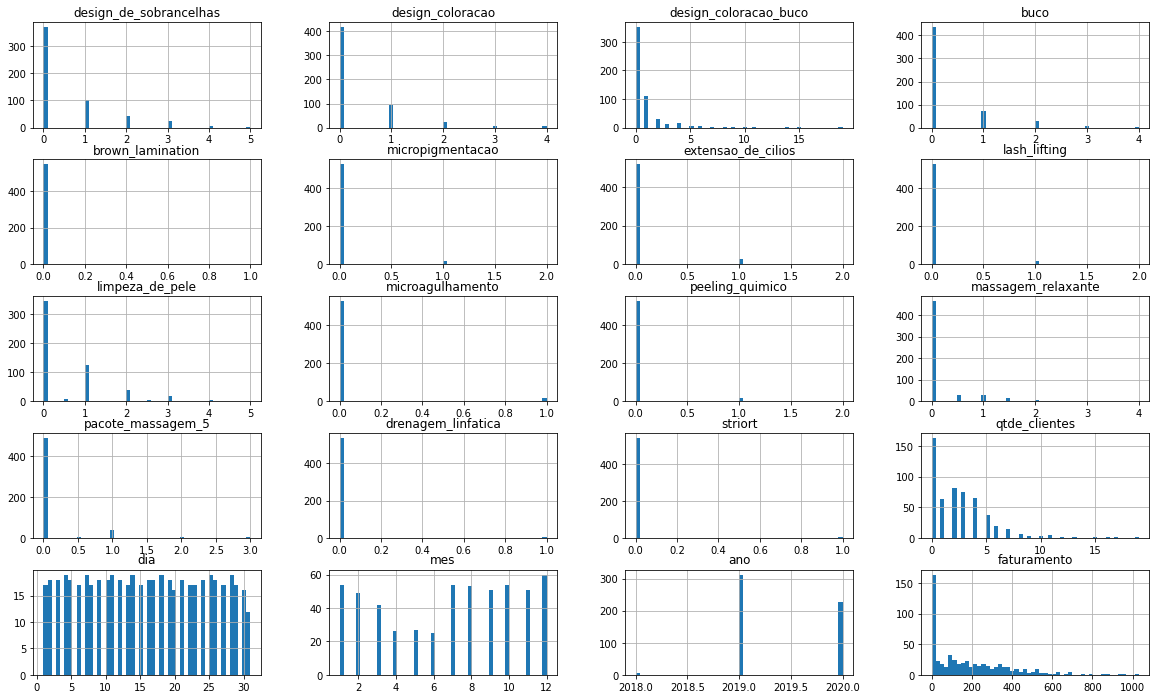

In [34]:
dados.hist(bins=50, figsize=(20,12))

 ## 4. Machine learning

 - Selecionando apenas as colunas que  importam para a modelagem.

In [35]:
dados_ml = dados[['qtde_clientes','dia','mes','dia_da_semana','faturamento']]

In [36]:
dados_ml = dados_ml[['dia','mes','dia_da_semana','qtde_clientes','faturamento']]

 - Transformando variáveis categóricas em variáveis numéricas.

In [37]:
dados_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dia            546 non-null    int32  
 1   mes            546 non-null    int64  
 2   dia_da_semana  546 non-null    object 
 3   qtde_clientes  546 non-null    float64
 4   faturamento    546 non-null    float64
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 19.3+ KB


In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
enconder = LabelEncoder()

In [40]:
dados_ml['dia_da_semana'] = enconder.fit_transform(dados_ml['dia_da_semana'])


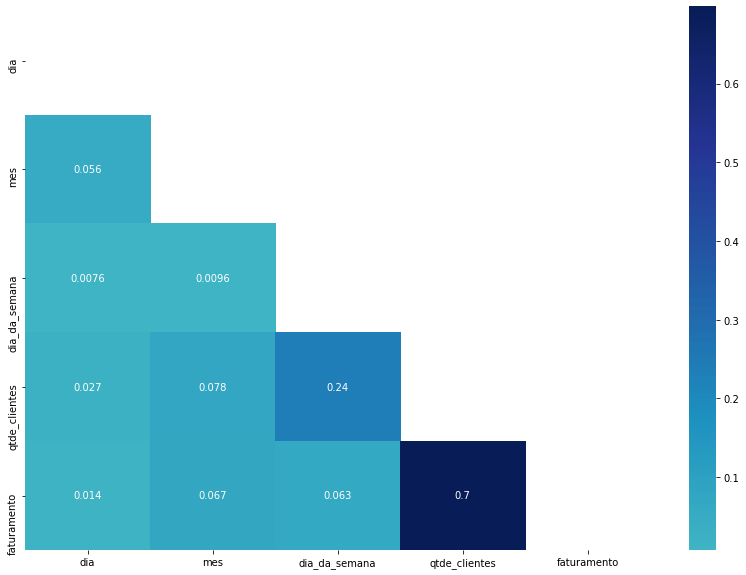

In [41]:
plt.figure(figsize=(14,10))

corr = dados_ml.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f951f392990>,
      dtype=object)

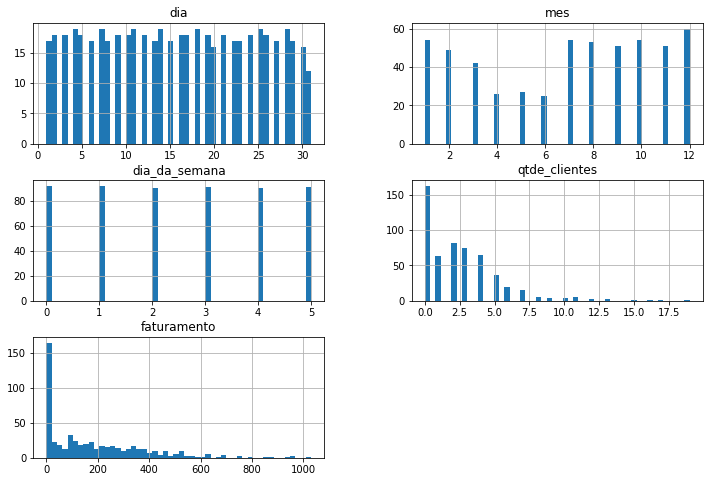

In [42]:
dados_ml.hist(bins=50, figsize=(12,8))

 - Normalizando os dados.

In [43]:
dados_ml['faturamento']=dados_ml['faturamento'].apply(np.log1p)
# dados['qtde_clientes']=dados['qtde_clientes'].apply(np.log1p)

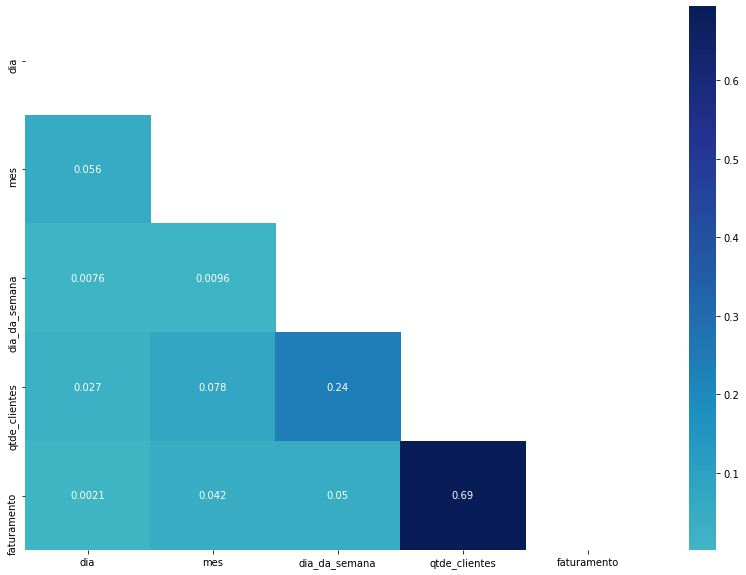

In [44]:
plt.figure(figsize=(14,10))

corr = dados_ml.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

 - Separando as amostras de treino e teste.

In [45]:
X = dados_ml[['dia','mes','dia_da_semana','qtde_clientes']]
Y = dados_ml['faturamento']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.25,random_state=0)

 - Modelo "Baseline" (Ponto de partida)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()
lr.fit(X_treino, Y_treino)
lr.score(X_teste, Y_teste)

0.4679618946200779

In [50]:
y_pred = lr.predict(X_teste)

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [52]:
MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)

print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 1.5065
MSE = 3.1233
RMSE = 1.7673
R2 = 0.4680


 - Machine learning

In [53]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_treino,Y_treino)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [54]:
y_pred = neigh.predict(X_teste)

In [55]:
# Root Mean Squared Error
np.sqrt(np.mean((y_pred-Y_teste.values)**2))

1.5582555495963275

In [56]:
# Mean Squared Error
np.mean((y_pred-Y_teste.values)**2)

2.4281603578477524

In [57]:
# Mean Absolute Error
np.mean(np.abs(y_pred-Y_teste.values))

1.0809959974639178

In [58]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(Y_teste, y_pred)

0.5863779248193369

 - Triagem com outros modelos

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
           
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 1.0
Test score 0.8488468133001307
Treinando RandomForestRegressor
Train score 0.9913088311591378
Test score 0.9191556511237668
Treinando MLPRegressor
Train score 0.8863945715126517
Test score 0.8859969667284493
Treinando XGBRegressor
[17:55:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.9668411704746355
Test score 0.9444525213446423


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


- Repetindo com validação cruzada.

In [60]:
# repetindo processo com validação cruzada
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Validation score', val_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 1.0
Validation score [0.89655546 0.9393631  0.82872931 0.87371166 0.92763503]
Test score 0.8460158013754355
Treinando RandomForestRegressor
Train score 0.9907129340021452
Validation score [0.9375714  0.95002074 0.84084191 0.94971788 0.96232163]
Test score 0.9213884240555777
Treinando MLPRegressor
Train score 0.8607356451770267
Validation score [0.86116921 0.85062593 0.74067334 0.84303448 0.86012187]
Test score 0.8565707876516084
Treinando XGBRegressor
[17:56:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:56:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:56:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:56:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:square

 - Calculando o erro.

In [61]:
reg = XGBRegressor()

In [62]:
reg.fit(X_treino, Y_treino)

[17:56:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [63]:
y_pred = reg.predict(X_teste)

In [67]:
MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)

print('MAE = {:0.8f}'.format(MAE))
print('MSE = {:0.8f}'.format(MSE))
print('RMSE = {:0.8f}'.format(RMSE))
print('R2 = {:0.8}'.format(R2))

MAE = 0.42810796
MSE = 0.32609039
RMSE = 0.57104325
R2 = 0.94445252


In [ ]:
# import pickle
# # now you can save it to a file
# with open('xgboost_regression.pkl', 'wb') as f:
#     pickle.dump(reg, f)